In [5]:
import pandas as pd

# Load dataset
file_path = r"C:\Users\ATHARVA\Downloads\Mall Customer Segmentation Data\Mall_Customers.csv"
df = pd.read_csv(file_path)

# Display dataset information
print("\nDataset Preview:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())



Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Statistical Summa

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encoding Gender (Male -> 0, Female -> 1)
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

# Selecting relevant features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("\nStandardized Data (First 5 rows):")
print(scaled_features[:5])



Standardized Data (First 5 rows):
[[-1.73899919 -0.43480148 -1.42456879  1.12815215]
 [-1.73899919  1.19570407 -1.28103541  1.12815215]
 [-1.70082976 -1.71591298 -1.3528021  -0.88640526]
 [-1.70082976  1.04041783 -1.13750203 -0.88640526]
 [-1.66266033 -0.39597992 -0.56336851 -0.88640526]]


C:\Users\ATHARVA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ATHARVA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ATHARVA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ATHARVA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

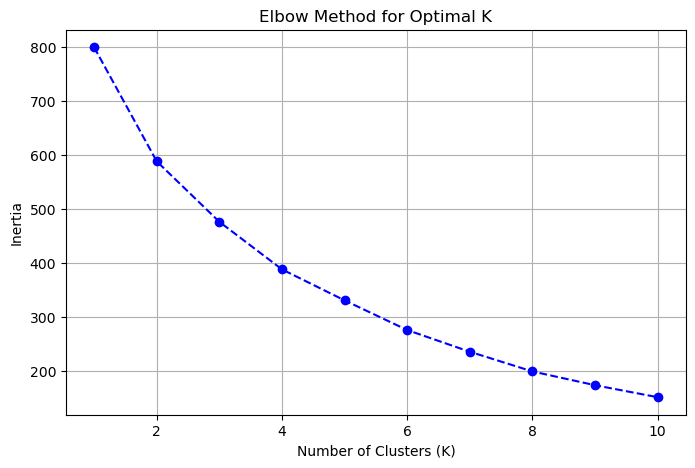

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Trying different K values
inertia_values = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [11]:
# Applying K-Means with optimal K
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display first few assigned clusters
print("\nCustomer Segmentation Results:")
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender', 'Cluster']].head())



Customer Segmentation Results:
   Annual Income (k$)  Spending Score (1-100)  Age  Gender  Cluster
0                  15                      39   19       1        3
1                  15                      81   21       1        3
2                  16                       6   20       0        3
3                  16                      77   23       0        3
4                  17                      40   31       0        3


C:\Users\ATHARVA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


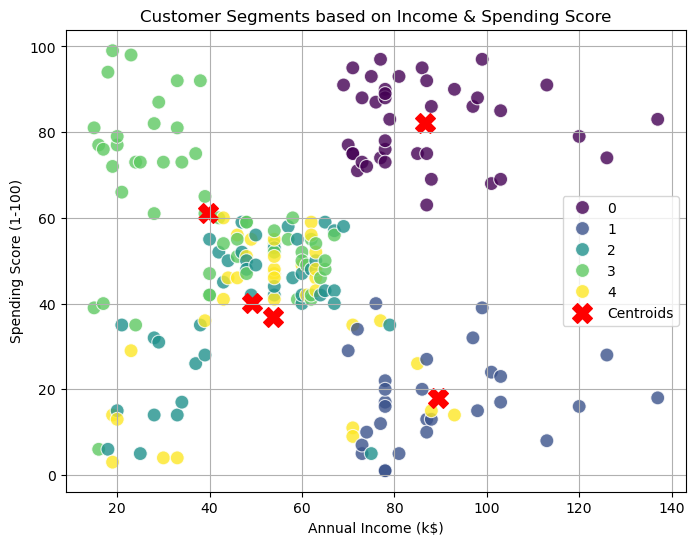

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], palette='viridis', s=100, alpha=0.8)

# Plot centroids
centroids = kmeans.cluster_centers_ * scaler.scale_ + scaler.mean_

plt.scatter(centroids[:, 0], centroids[:, 1], 
            color='red', marker='X', s=200, label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Income & Spending Score')
plt.legend()
plt.grid(True)
plt.show()


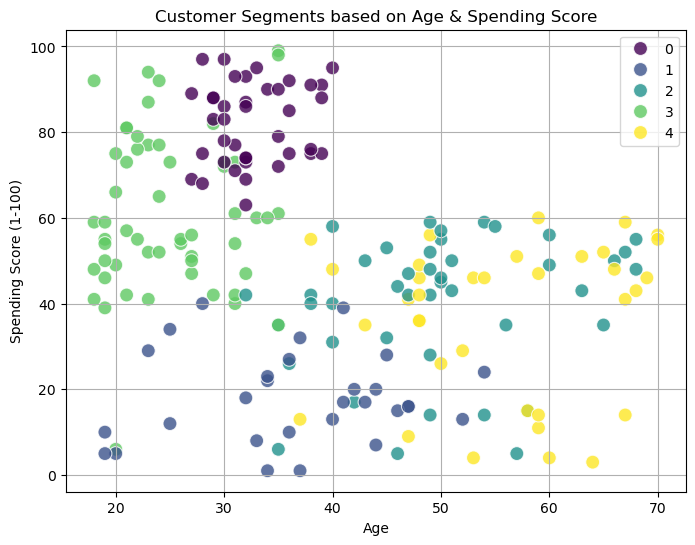

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], 
                hue=df['Cluster'], palette='viridis', s=100, alpha=0.8)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments based on Age & Spending Score')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
def predict_cluster(new_customer):
    """
    Predicts the customer segment based on the trained K-Means model.
    
    Parameters:
    - new_customer: List containing [Annual Income, Spending Score, Age, Gender]
    
    Returns:
    - Predicted cluster
    """
    new_customer_scaled = scaler.transform([new_customer])
    predicted_cluster = kmeans.predict(new_customer_scaled)
    return predicted_cluster[0]

# Example: Predict cluster for a new customer
new_customer = [70, 85, 25, 1]  # Annual Income: 70k, Spending Score: 85, Age: 25, Gender: Female
predicted_cluster = predict_cluster(new_customer)

print(f"\nNew Customer (Income: {new_customer[0]}k, Spending Score: {new_customer[1]}, Age: {new_customer[2]}) belongs to Cluster {predicted_cluster}")



New Customer (Income: 70k, Spending Score: 85, Age: 25) belongs to Cluster 0


C:\Users\ATHARVA\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
# Define personalized offers for each cluster
personalized_offers = {
    0: "Exclusive luxury discounts for high spenders 💎",
    1: "Budget-friendly deals & seasonal offers 💰",
    2: "Loyalty rewards for frequent shoppers 🎁",
    3: "Student discounts & trendy offers 🛍️",
    4: "Balanced deals for regular customers ⚖️"
}

# Assign personalized offers to each customer
df['Personalized Offer'] = df['Cluster'].map(personalized_offers)

# Display customer clusters with personalized offers
print("\nCustomer Segments with Personalized Offers:")
print(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age', 'Gender', 'Cluster', 'Personalized Offer']].head())



Customer Segments with Personalized Offers:
   Annual Income (k$)  Spending Score (1-100)  Age  Gender  Cluster  \
0                  15                      39   19       1        3   
1                  15                      81   21       1        3   
2                  16                       6   20       0        3   
3                  16                      77   23       0        3   
4                  17                      40   31       0        3   

                     Personalized Offer  
0  Student discounts & trendy offers 🛍️  
1  Student discounts & trendy offers 🛍️  
2  Student discounts & trendy offers 🛍️  
3  Student discounts & trendy offers 🛍️  
4  Student discounts & trendy offers 🛍️  
